In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lab | Random variable distributions.

## Loading libraries:

In [11]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1) Get the numerical variables from our dataset.

In [12]:
numerical = round(customer_df.select_dtypes(np.number),2)

numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


## 2) Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

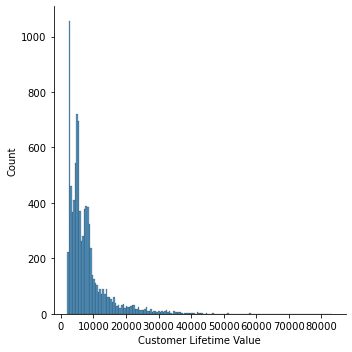

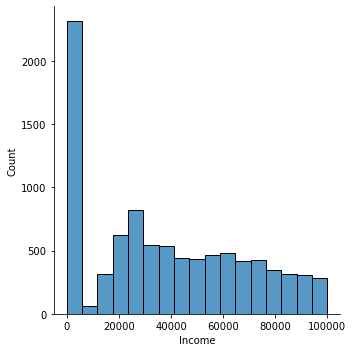

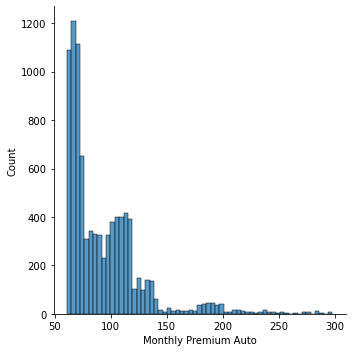

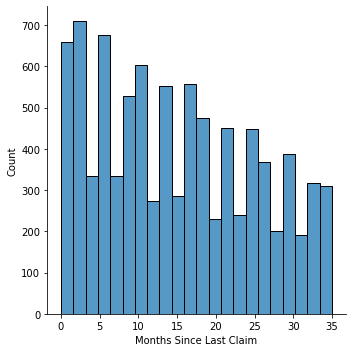

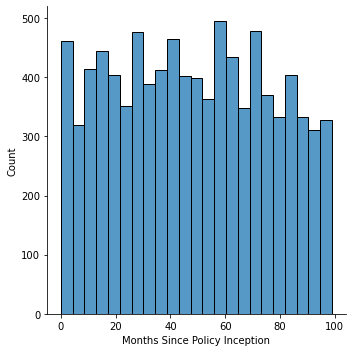

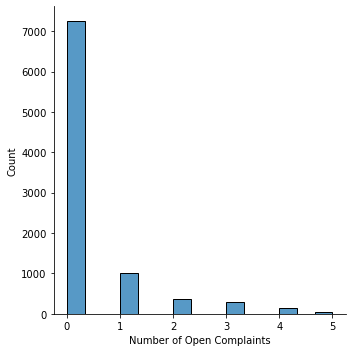

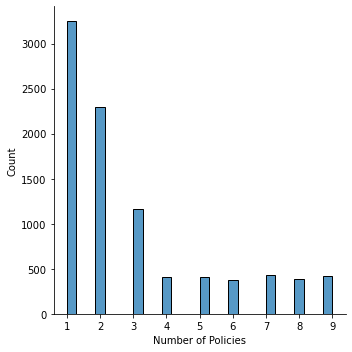

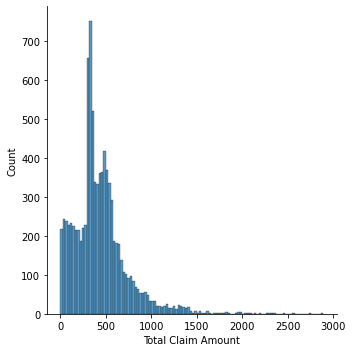

In [15]:
for col in numerical.columns:
    sns.displot(x = col, data = numerical)
    
    

'Total Claim Amount' and 'Customer Lifetime Value' could 'MAYBE' be considered a really skewed normal distribution, but in general most of the plots follow the overtime decay of an exponential distribution.

There's a particular case in 'Months Since Policy Inception', here I think we would need more data to answer this question since the plot doesn't give enough information.

## 3) Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

## Normalize the data:

In [23]:
from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler()

Standardtransformer.fit(numerical) 

numerical_st = Standardtransformer.transform(numerical)

numerical_st = round(pd.DataFrame(numerical_st,columns=numerical.columns),2)

numerical_st.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.76,0.61,-0.70,1.68,-1.54,-0.42,-0.82,-0.17
1,-0.15,-1.24,0.02,-0.21,-0.22,-0.42,2.11,2.40
2,0.71,0.37,0.43,0.29,-0.36,-0.42,-0.40,0.46
3,-0.05,-1.24,0.37,0.29,0.61,-0.42,1.69,0.33
4,-0.76,0.20,-0.59,-0.31,-0.15,-0.42,-0.82,-1.02


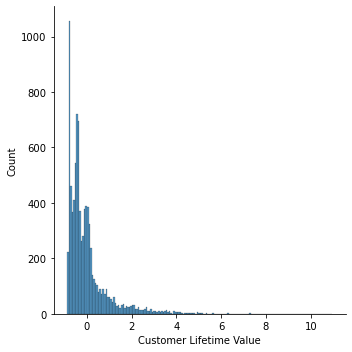

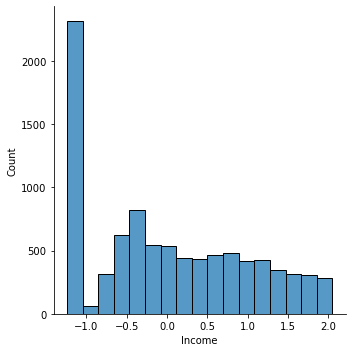

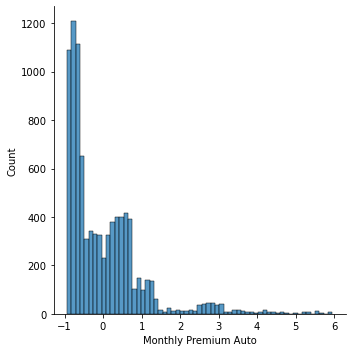

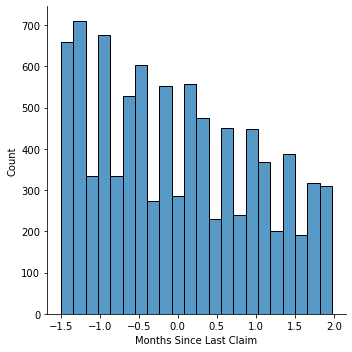

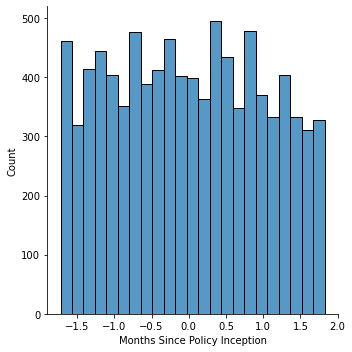

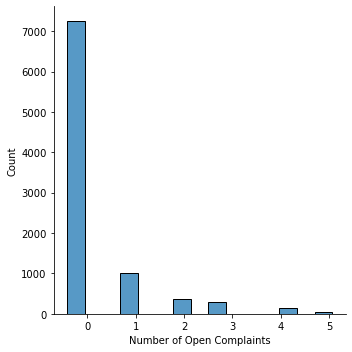

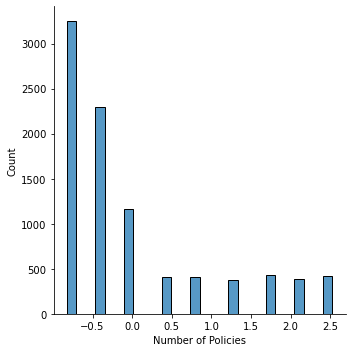

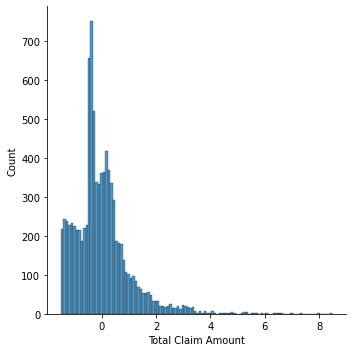

In [18]:
for col in numerical_st.columns:
    sns.displot(x = col, data = numerical_st)

## Box-cox transformation:

In [25]:
from sklearn.preprocessing import PowerTransformer

transformer_pt = PowerTransformer()

transformer_pt.fit(numerical)

numerical_pt = transformer_pt.transform(numerical)

numerical_pt = round(pd.DataFrame(numerical_pt, columns=numerical.columns),2)

numerical_pt.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.000004,1.000068,-2.24,-0.67,-0.03,0.64,2.81
Income,9134.0,0.000272,0.999634,-1.64,-1.64,0.37,0.76,1.11
Monthly Premium Auto,9134.0,-0.000366,1.000787,-1.55,-0.93,-0.02,0.87,2.27
Months Since Last Claim,9134.0,0.000546,0.999418,-1.95,-0.83,0.06,0.82,1.66
Months Since Policy Inception,9134.0,0.000269,1.000357,-2.10,-0.79,0.09,0.83,1.64
Number of Open Complaints,9134.0,0.000036,1.001502,-0.51,-0.51,-0.51,-0.51,2.03
Number of Policies,9134.0,-0.002230,1.001428,-1.15,-1.15,-0.06,0.88,1.67
Total Claim Amount,9134.0,-0.000169,1.000201,-2.82,-0.44,0.00,0.55,4.75


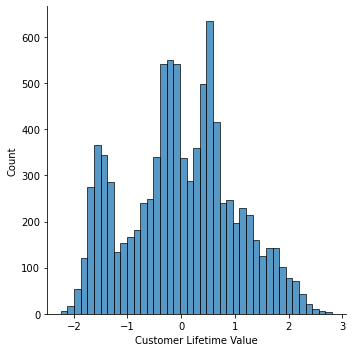

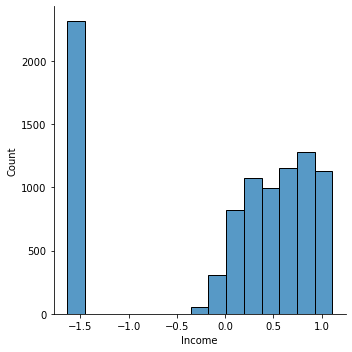

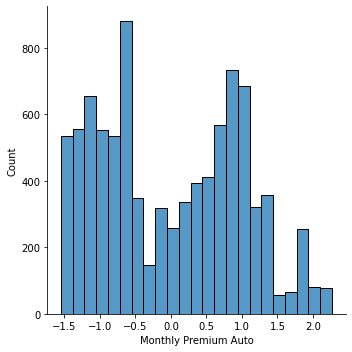

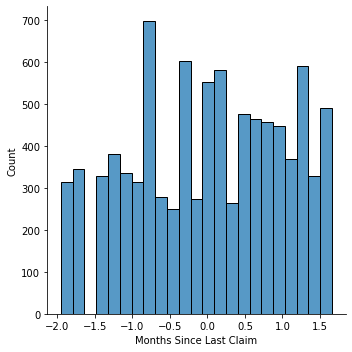

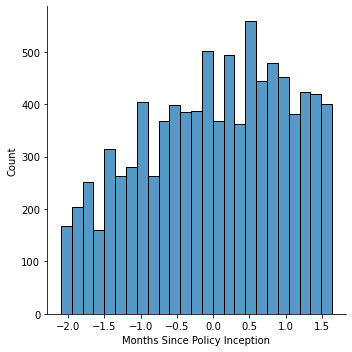

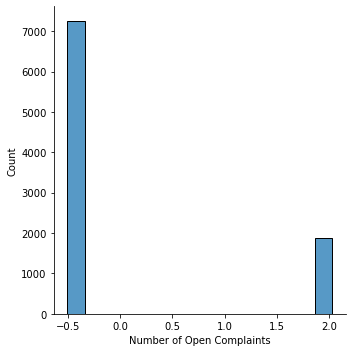

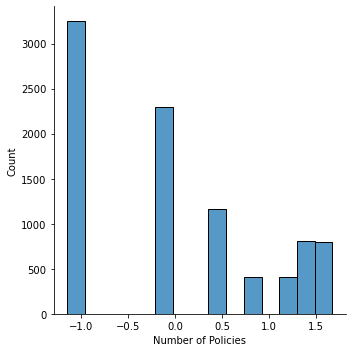

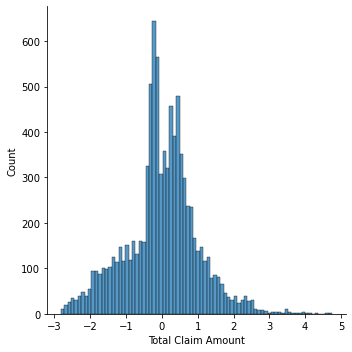

In [57]:
for col in numerical_pt.columns:
    sns.displot(x = col, data = numerical_pt)

## Logarithmic transformation:

In [55]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

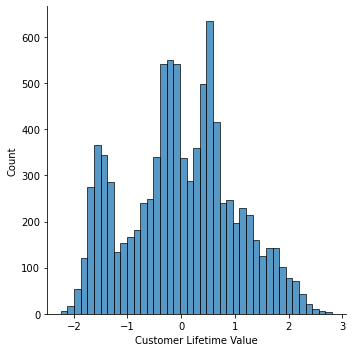

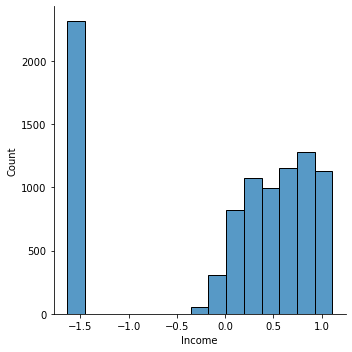

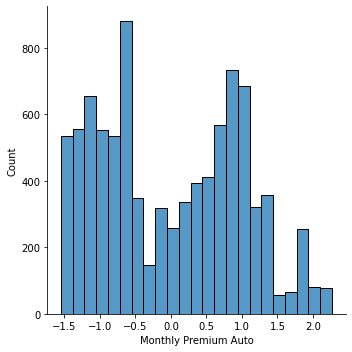

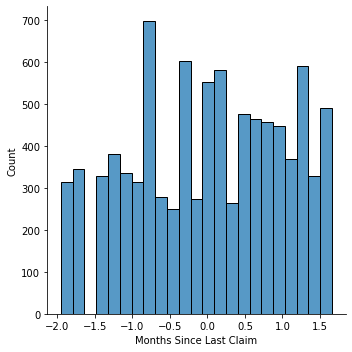

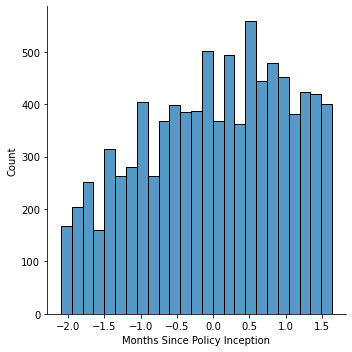

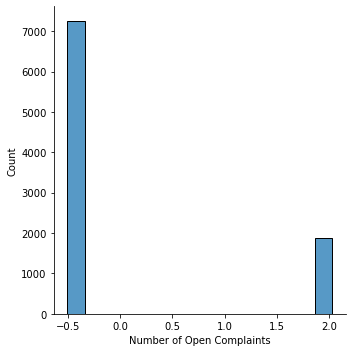

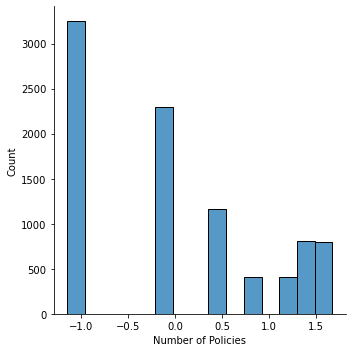

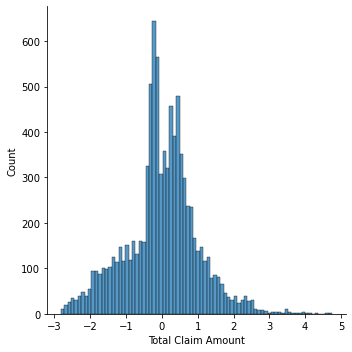

In [26]:
for col in numerical_pt.columns:
    sns.displot(x = col, data = numerical_pt)

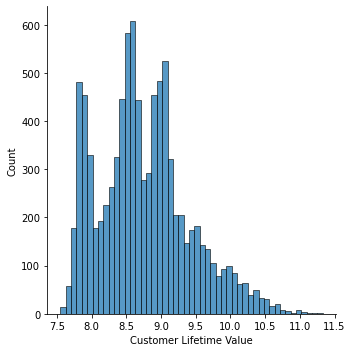

In [56]:
sns.displot(numerical['Customer Lifetime Value'].apply(log_transform))
plt.show()

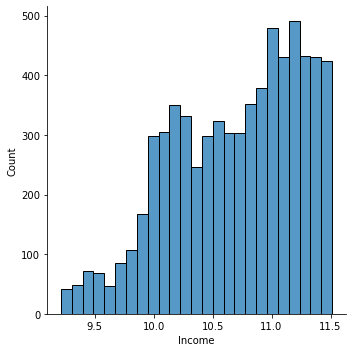

In [37]:
sns.displot(numerical['Income'].apply(log_transform))
plt.show()

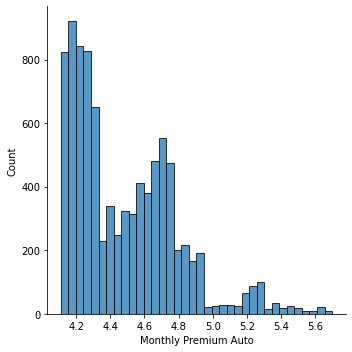

In [43]:
sns.displot(numerical['Monthly Premium Auto'].apply(log_transform))
plt.show()

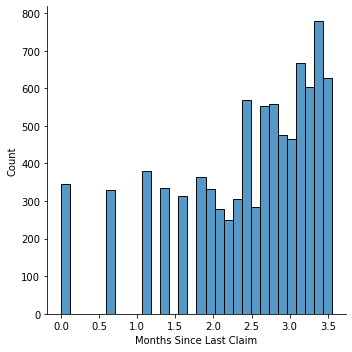

In [48]:
sns.displot(numerical['Months Since Last Claim'].apply(log_transform))
plt.show()

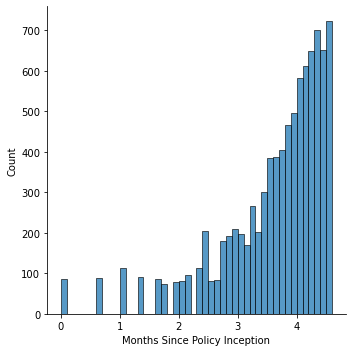

In [44]:
sns.displot(numerical['Months Since Policy Inception'].apply(log_transform))
plt.show()

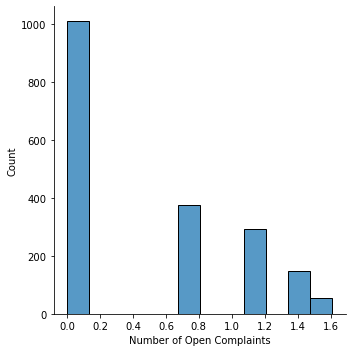

In [46]:
sns.displot(numerical['Number of Open Complaints'].apply(log_transform))
plt.show()

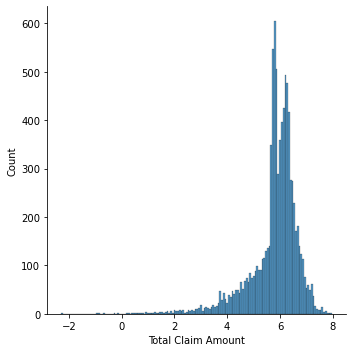

In [47]:
sns.displot(numerical['Total Claim Amount'].apply(log_transform))
plt.show()

## box-cox + log:

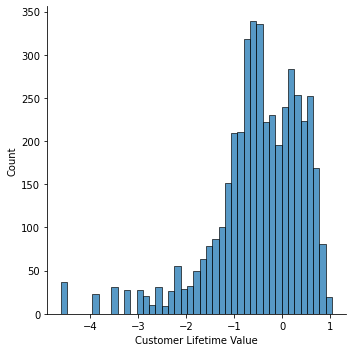

In [53]:
sns.displot(numerical_pt['Customer Lifetime Value'].apply(log_transform))

plt.show()

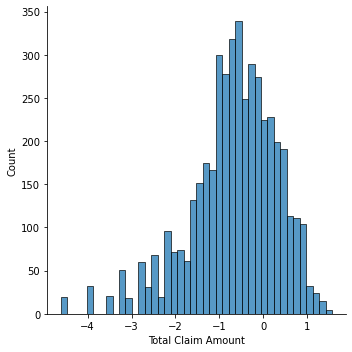

In [54]:
sns.displot(numerical_pt['Total Claim Amount'].apply(log_transform))

plt.show()

The closest I was to a normal distribution was by the box-cox transformation in for the 'customer lifetime value' and 'total claim amount'columns. 

However, through the log transformation both of these columns' distributions also started to take the shape of a normal distribution.

So on these last 2 cells I tried mixing both box-cox and log transformations to see if they provided better results. Now the data is centered a little bit more towards the mean but it is still far away from a normal distribution.